#### Question 3 (3 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import random
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [2]:
model = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train,y_train)
decision = model.decision_function(X_test)
auc = metrics.roc_auc_score(y_score = decision , y_true = y_test)
auc

0.9808159009329064

b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

In [3]:
training_size = np.shape(X_train)[0]
AUC_100 = []
AUC_300 = []
AUC_1000 = []
for i in range(1000):
    random_100 = np.random.choice(np.arange(training_size),size=100,replace=False)
    random_300 = np.random.choice(np.arange(training_size),size=300,replace=False)
    random_1000 = np.random.choice(np.arange(training_size),size=1000,replace=False)
    model_100 = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train[random_100],y_train[random_100])
    decision_100 = model_100.decision_function(X_test)
    auc_100 = metrics.roc_auc_score(y_score = decision_100 , y_true = y_test)
    AUC_100.append(auc_100)
    model_300 = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train[random_300],y_train[random_300])
    decision_300 = model_300.decision_function(X_test)
    auc_300 = metrics.roc_auc_score(y_score = decision_300 , y_true = y_test)
    AUC_300.append(auc_300)
    model_1000 = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train[random_1000],y_train[random_1000])
    decision_1000 = model_1000.decision_function(X_test)
    auc_1000 = metrics.roc_auc_score(y_score = decision_1000 , y_true = y_test)
    AUC_1000.append(auc_1000)


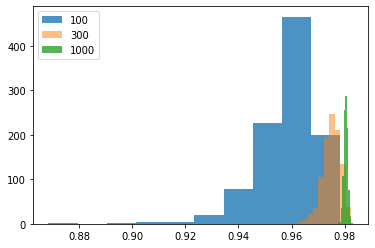

In [4]:
plt.hist(AUC_100,bins=10,label='100',alpha=0.8)
plt.hist(AUC_300,bins=10,label='300',alpha=0.5,)
plt.hist(AUC_1000,bins=10,label='1000',alpha=0.8)
plt.legend()

c. What pattern did you see from the plot you get from 3b? Explain your findings.

### First of all, it is clear by increasing the number of samples our model works better and we get better AUC mean,also by increasing the samples the variance of AUC decrease. 